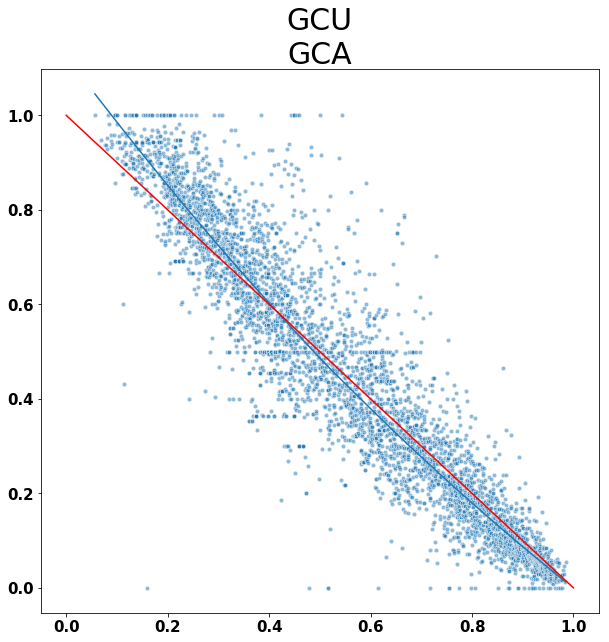

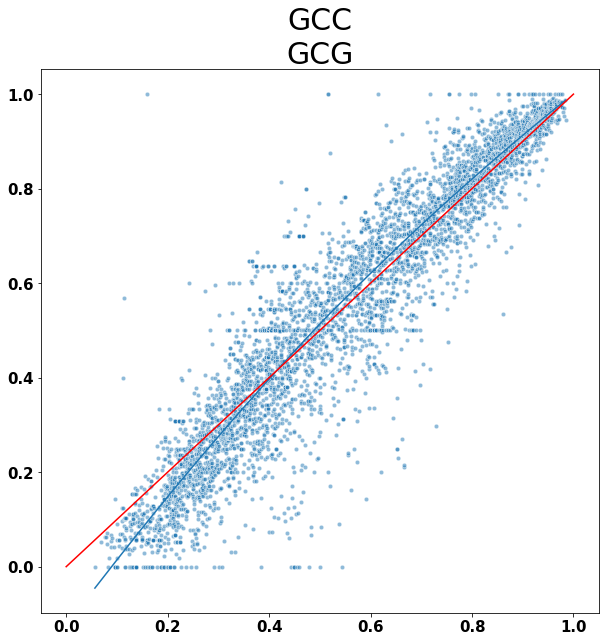

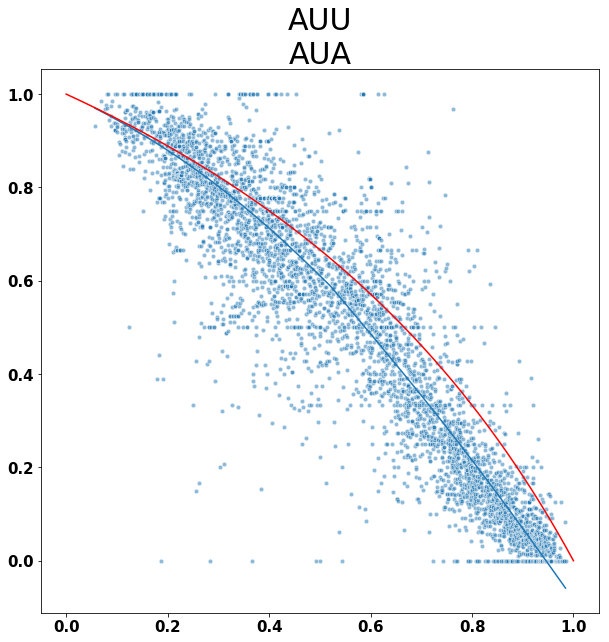

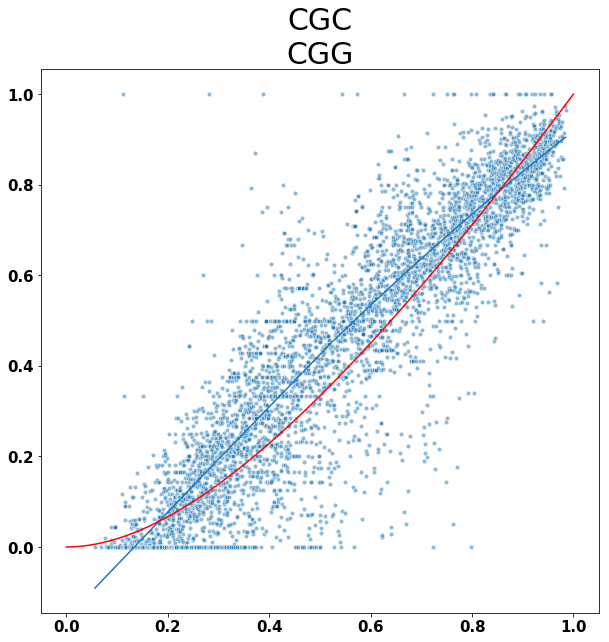

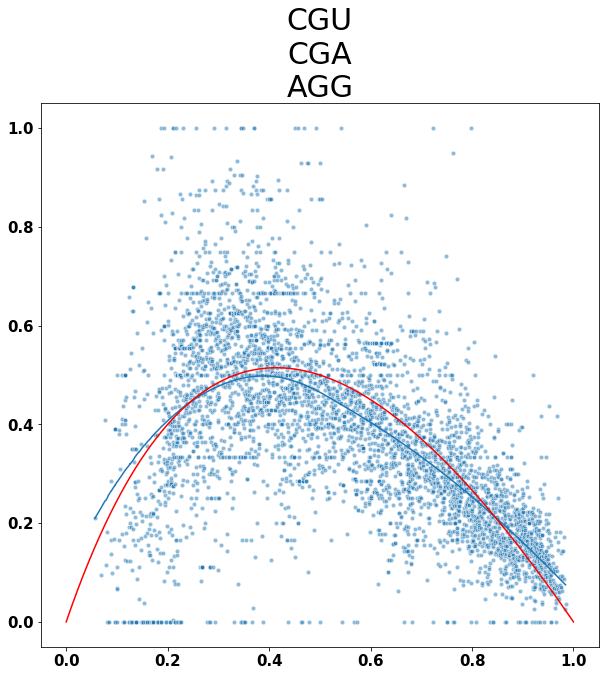

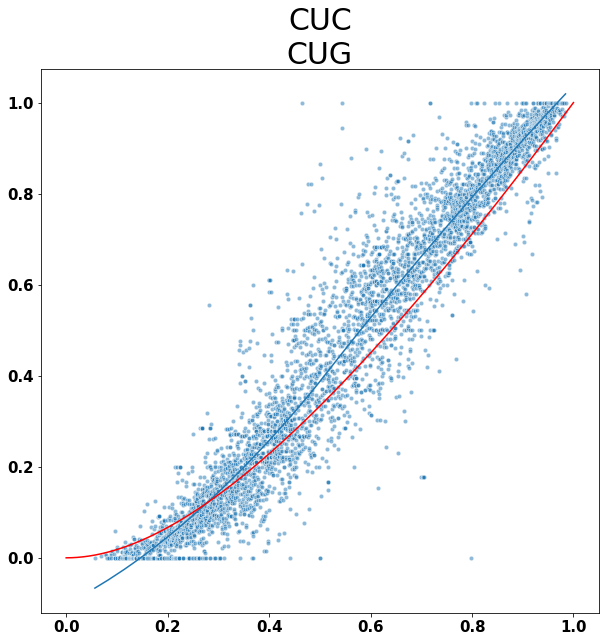

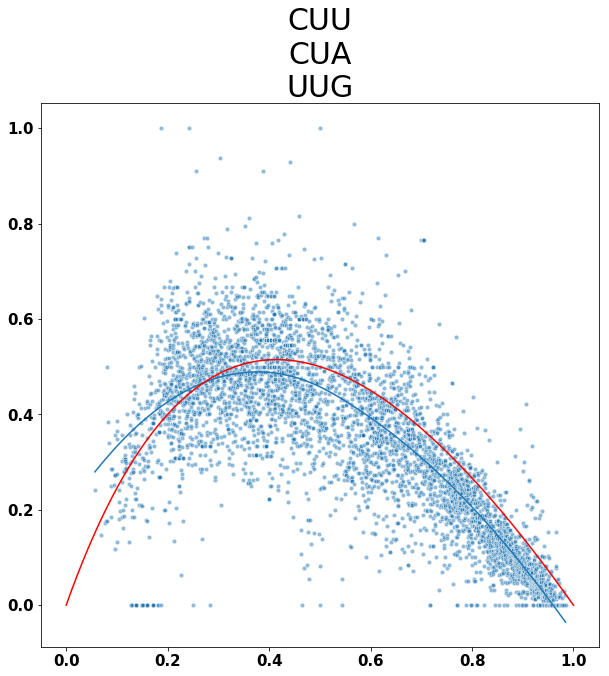

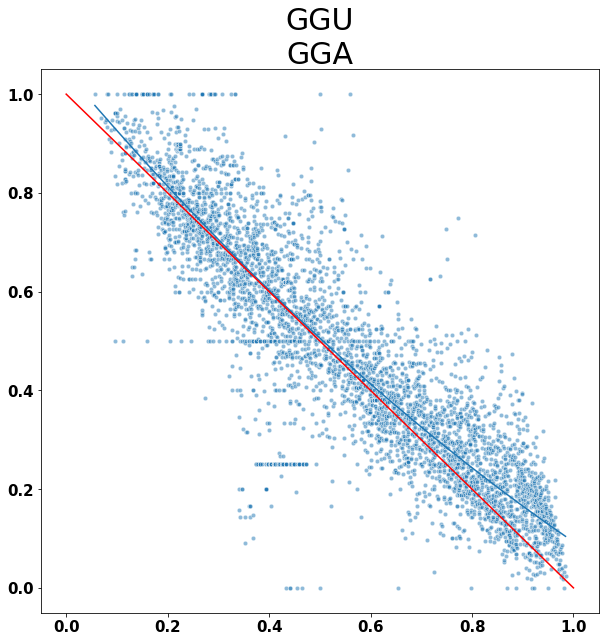

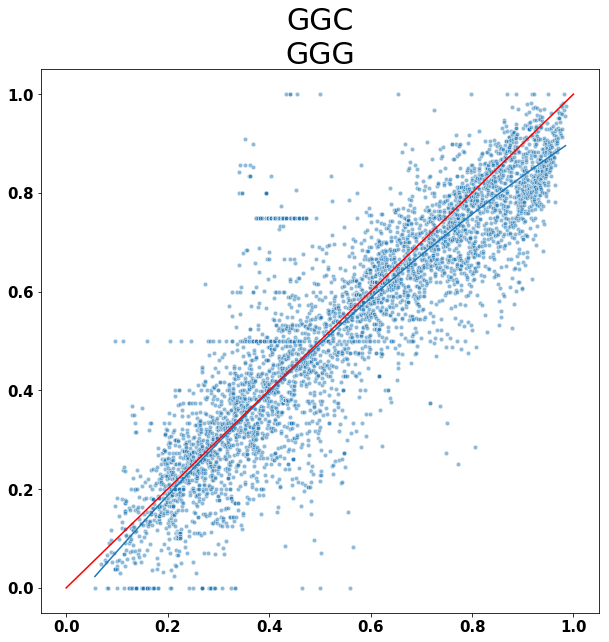

<Figure size 720x720 with 0 Axes>

In [4]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from loess_1d import loess_1d
from model_definer import y_model
codons=[["GCU", "GCA"], ["GCC", "GCG"], ["AUU", "AUA"], ["CGC", "CGG"], ["CGU", "CGA", "AGG"], ["CUC", "CUG"], ["CUU", "CUA", "UUG"], ["GGU", "GGA"], ["GGC", "GGG"]]
for subgroup in codons:
    df = pd.read_csv("df_proc_relfreq.csv", sep=",", index_col=0)
    y = np.array(np.sum([np.array(df[codon]) for codon in subgroup], axis=0))
    x = np.array(df["gc_fraction"])
    width, height = 10, 10
    mpl.rcParams['figure.figsize'] = [width, height]
    sns.scatterplot(x, y, data=df, s=20, alpha=0.5)
    xout, yout, wout = loess_1d(x, y, frac=1, degree=2)
    sns.lineplot(xout, yout)
    plt.xticks(size=15, weight='bold')
    plt.yticks(size=15, weight='bold')
    x_mod = np.linspace(start = 0, stop = 1, num = 1000)
    y_mod = y_model(subgroup[0])*len(subgroup)
    sns.lineplot(x_mod, y_mod, linestyle = '--', color = 'red')
    plt.title('\n'.join(subgroup), size=30)
    plt.figure()
